# Домашнее задание "Продвинутая оптимизация".
## Задание
При фиксированном `seed=42` поэкспериментируйте с параметрами алгоритма [differential_evolution](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.differential_evolution.html): strategy, popsize, mutation.

Постройте графики количества итераций (`nit`) оптимизации [функции ackley](https://en.wikipedia.org/wiki/Ackley_function) от значения параметра.

Подробнее о результате выдачи [тут](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.OptimizeResult.html).

In [1]:
import numpy as np
from scipy.optimize import differential_evolution
import matplotlib.pyplot as plt

%matplotlib inline

In [7]:
def ackley(x):
    arg1 = -0.2 * np.sqrt(0.5 * (x[0] ** 2 + x[1] ** 2))
    arg2 = 0.5 * (np.cos(2. * np.pi * x[0]) + np.cos(2. * np.pi * x[1]))
    return -20. * np.exp(arg1) - np.exp(arg2) + 20. + np.e

bounds = [(-10, 10), (-10, 10)]

result = differential_evolution(ackley, bounds, seed=42, strategy='best2exp', popsize=10, mutation=[0.2, 1.3])
result

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 4203
     nit: 206
 success: True
       x: array([0., 0.])

In [ ]:
result.nit

206

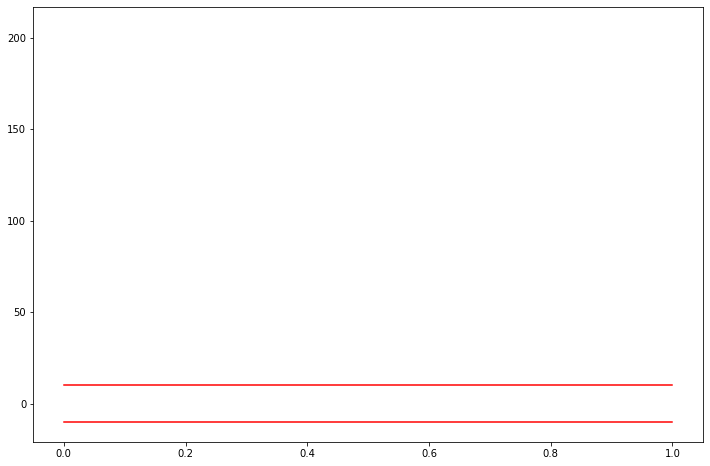

In [20]:
plt.figure(figsize=(12, 8))
plt.plot(result.nit, color='blue')
plt.plot(bounds, color='red')
plt.show()